# Executive Summary

The World Health Organization (WHO) has provided a dataset from 2005 to 2015 with life expectancies and Gross Domestic Production (GDP) for Chile, China, Germany, Mexico, United States of America and Zimbabwe. The report seeks to find any relationship between the GDP and the life expectancies of the aftermentioned countries. The data seems to support that lower values of life expectancy are more sensetive to changes in GDP. All countries except China, before 2006, and Zimbabwe do show positive correlation between changes in GDP and changes in expected life expectancy. Each country show their own rate of the correlation, likely due to each country's specific circumstances. 

# Introduction

For this project, you will act as a data researcher for the World Health Organization. You will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

During this project, you will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

After you perform analysis, you'll be creating an article with your visualizations to be featured in the fictional "Time Magazine".

Focusing Questions:

    Has life expectancy increased over time in the six nations?
    Has GDP increased over time in the six nations?
    Is there a correlation between GDP and life expectancy of a country?
    What is the average life expactancy in these nations?
    What is the distribution of that life expectancy?

GDP Source:World Banknational accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization


# Procedure

## Step 1:  Import Required Python Modules

Import the modules that you'll be using in this project:

    from matplotlib import pyplot as plt
    import pandas as pd
    import seaborn as sns



In [76]:
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


## Step 2: Prep The Data

To look for connections between GDP and life expectancy you will need to load the datasets into DataFrames so that they can be visualized.

Load all_data.csv into a DataFrame called df. Then, quickly inspect the DataFrame using .head().

Hint: Use pd.read_csv()


In [77]:
df = pd.read_csv('all_data.csv')

## Step 3: Examine the Data

The datasets are large and it may be easier to view the entire dataset locally on your computer. You can open the CSV files directly from the folder you downloaded for this project.

Let's learn more about our data:

    GDP stands for Gross Domestic Product. GDP is a monetary measure of the market value of all final goods and services produced in a time period.
    The GDP values are in current US dollars.



In [78]:
print(color.BLUE + "Checking dataframe size:" + color.END + "\n",df.count(), sep = '') #Checking dataframe size
print("\n" + color.BLUE + "Checking datatypes:" + color.END + "\n",df.dtypes, sep = '') #Checking datatypes
print("\n" + color.BLUE + "Checking data format:" + color.END + "\n")
display(df.head(5)) #Checking data format
print("\n" + color.BLUE + "Identified Category Column, checking unique COUNTRY entries:" + color.END+ "\n", df.Country.unique(), sep = '') #Identified Category Column, checking unique entries
print("\n" + color.BLUE + "Identified Category Column, checking unique YEAR entries:" + color.END+ "\n", df.Year.unique(), sep = '') #Identified Category Column, checking unique entries
null_data = df[df.isnull().any(axis=1)] #Checking missing entries
print("\n" + color.BLUE + "Checking missing entries:" + color.END+ "\n", null_data, sep = '')
exp_of_rows = df.Country.nunique() * df.Year.nunique() == 96 #Checking missing rows
print("\n" + color.BLUE + "Number of rows check out:" + color.END+ "\n", exp_of_rows, sep = '')
               


Checking dataframe size:
Country                             96
Year                                96
Life expectancy at birth (years)    96
GDP                                 96
dtype: int64

Checking datatypes:
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

Checking data format:



,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10



Identified Category Column, checking unique COUNTRY entries:
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']

Identified Category Column, checking unique YEAR entries:
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]

Checking missing entries:
Empty DataFrame
Columns: [Country, Year, Life expectancy at birth (years), GDP]
Index: []

Number of rows check out:
True


#### What six countries are represented in the data?

Chile, China, Germany, Mexico, United States of America and Zimbabwe are represented in the dataset

#### What years are represented in the data?

All countires have a complete dataset from the year 2000 to 2015.

## Step 4: Tweak the DataFrame

Look at the column names of the DataFrame df using .head(). 
What do you notice? The first two column names are one word each, and the third is five words long! Life expectancy at birth (years) is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself.

Revise The DataFrame Part A:

Use Pandas to change the name of the last column to LEABY.

Hint: Use .rename()

Run df.head() again to check your new column name worked


In [79]:
print("\n" + color.BLUE + "Column names:" + color.END + "\n")
display(df.head(5))
df.rename(columns={"Life expectancy at birth (years)":"LEABY"}, inplace=True, errors="raise")
print("\n" + color.BLUE + "Column renamed:" + color.END + "\n")
display(df.head(5))


Column names:



,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10



Column renamed:



,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Step 5: Bar Charts to compare averages

To take a first high level look at both datasets, create a bar chart for each DataFrame:

A) Create a bar chart from the data in df using Country on the x-axis and GDP on the y-axis. Remember to plt.show() your chart

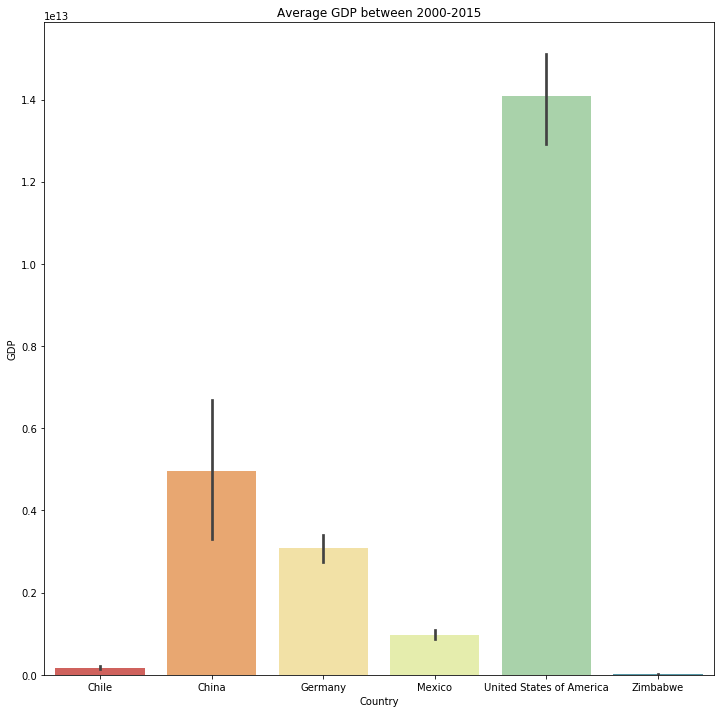

In [80]:
plt.figure(figsize=(12,12))
sns.barplot(data=df , x ="Country", y ="GDP")
plt.title("Average GDP between 2000-2015")
plt.savefig("Bar graph Avg GDP combined.png")
plt.show()


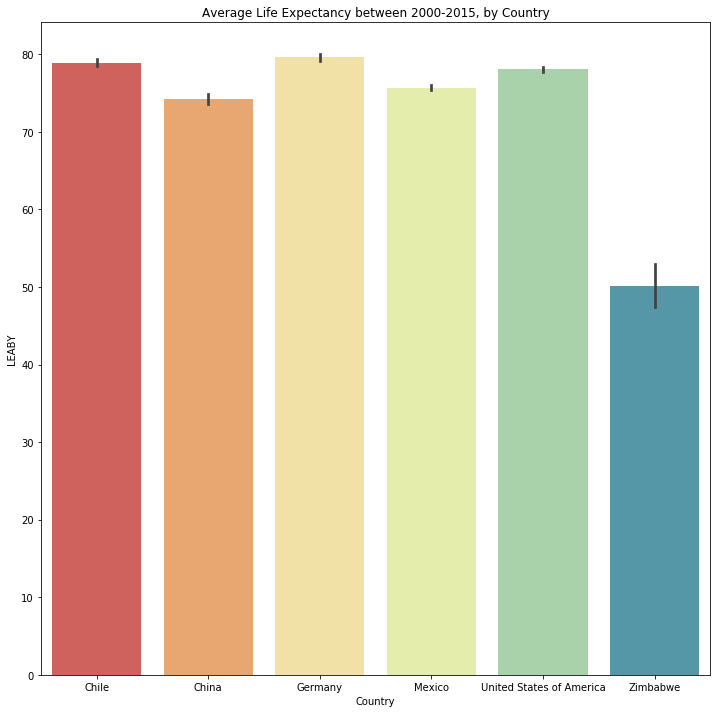

In [81]:
plt.figure(figsize=(12,12))
sns.barplot(data=df , x ="Country", y ="LEABY")
plt.title("Average Life Expectancy between 2000-2015, by Country")
plt.savefig("Bar graph Avg LEABY combined.png")
plt.show()

## Step 6: Violin Plots to Compare Life Expectancy Distributions

Another way to compare two datasets is to visualize the distributions of each and to look for patterns in the shapes.

We have added the code to instantiate a figure with the correct dimmensions to observe detail.

    Create an sns.violinplot() for the dataframe df and map Country and LEABY as its respective x and y axes.
    Be sure to show your plot

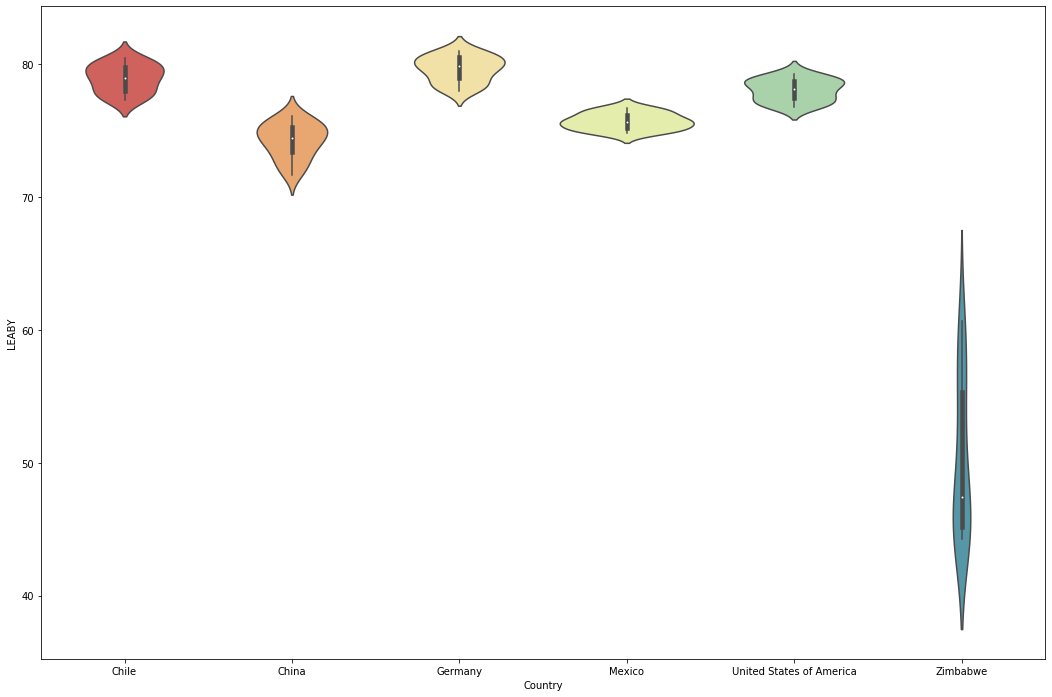

In [82]:
sns.set_palette('Spectral')
plt.figure(figsize=(18,12))
sns.violinplot(data=df, x='Country', y='LEABY')
plt.savefig("Vio graph LEABY by country.png")
plt.show()

#### What do you notice about this distribution? Which country's life expactancy has changed the most?

## Step 7: Bar Plots of GDP and Life Expectancy over time

We want to compare the GDPs of the countries over time, in order to get a sense of the relationship between GDP and life expectancy.

First, can plot the progession of GDP's over the years by country in a barplot using Seaborn. We have set up a figure with the correct dimensions for your plot. Under that declaration:

    Save sns.barplot() to a variable named ax
    Chart Country on the x axis, and GDP on the Y axis on the barplot. Hint: ax = sns.barplot(x="Country", y="GDP")
    Use the Year as a hue to differentiate the 15 years in our data. Hint: ax = sns.barplot(x="Country", y="GDP", hue="Year", data=df)
    Since the names of the countries are long, let's rotate their label by 90 degrees so that they are legible. Use plt.xticks("rotation=90")
    Since our GDP is in trillions of US dollars, make sure your Y label reflects that by changing it to "GDP in Trillions of U.S. Dollars". Hint: plt.ylabel("GDP in Trillions of U.S. Dollars")
    Be sure to show your plot.


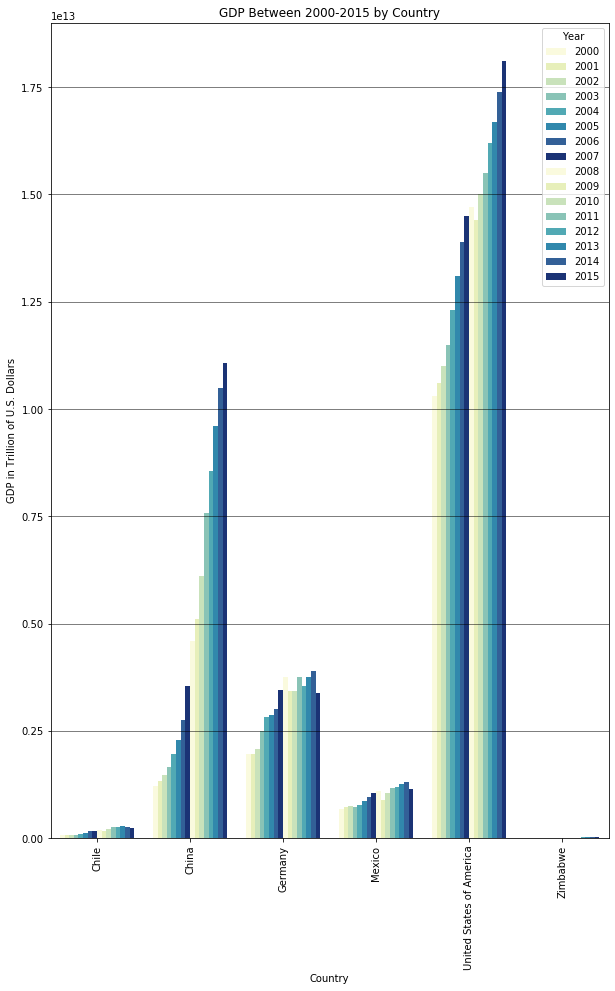

In [83]:
f, ax = plt.subplots(figsize=(10,15))
cus = sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8','#0c2c84'])
sns.barplot(data=df , x ="Country", y ="GDP", hue="Year", palette=cus)
plt.xticks(rotation=90)
plt.title("GDP Between 2000-2015 by Country")
plt.grid(axis='y', which='both', color='black', linestyle='-', linewidth=0.5)
plt.ylabel("GDP in Trillion of U.S. Dollars")
plt.savefig("Bar GDP by Year by Country.png")
plt.show()

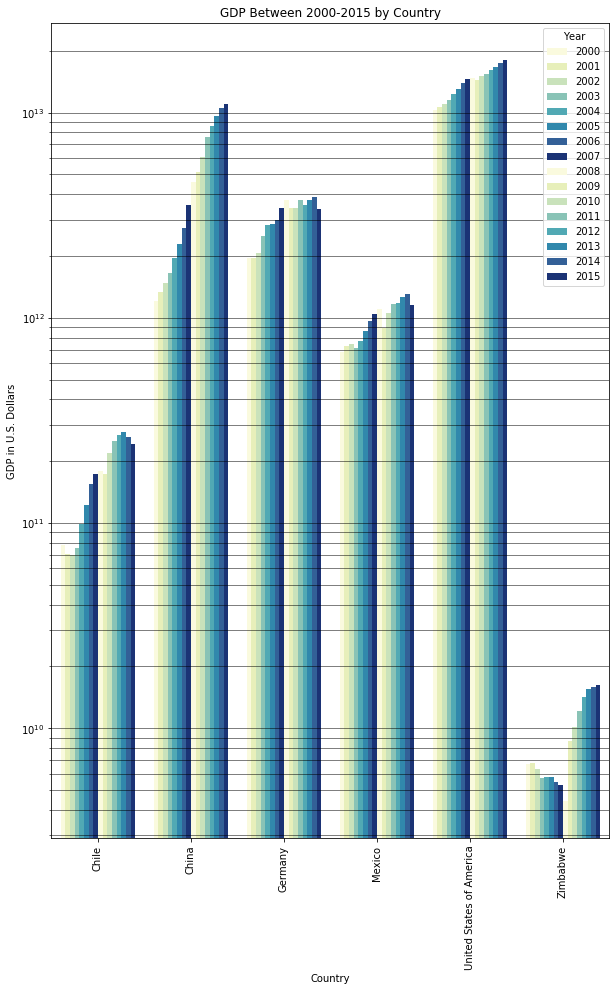

In [84]:
f, ax = plt.subplots(figsize=(10,15))
cus = sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8','#0c2c84'])
sns.barplot(data=df , x ="Country", y ="GDP", hue="Year", palette=cus)
plt.xticks(rotation=90)
plt.title("GDP Between 2000-2015 by Country")
ax.set(yscale="log")
plt.grid(axis='y', which='both', color='black', linestyle='-', linewidth=0.5)
plt.ylabel("GDP in U.S. Dollars")
plt.savefig("Bar Log GDP by Year Country.png")
plt.show()

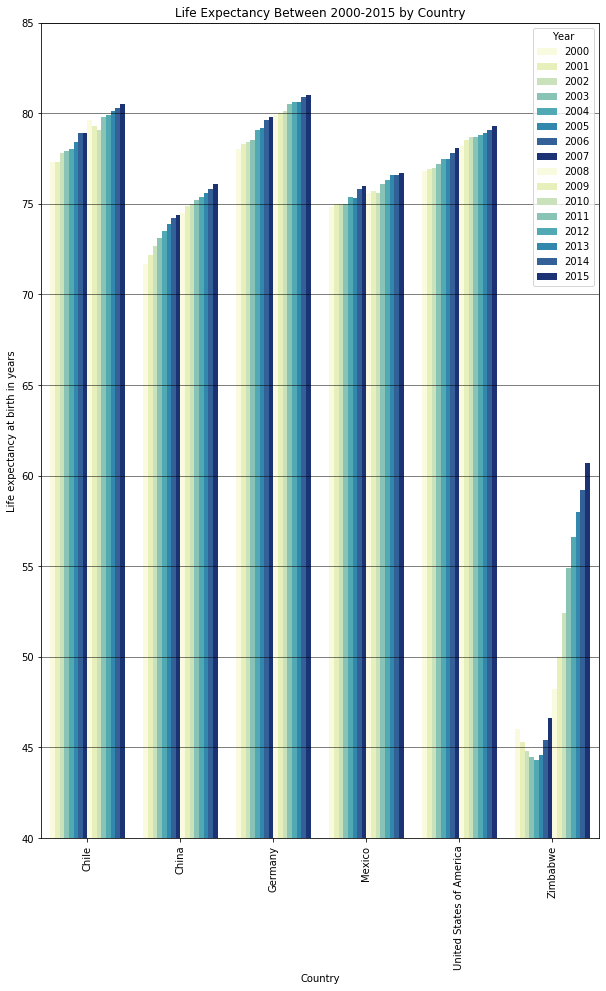

In [85]:
f, ax = plt.subplots(figsize=(10,15))
sns.barplot(data=df , x ="Country", y ="LEABY", hue="Year", palette=cus)
plt.xticks(rotation=90)
ax.set(ylabel="Life expectancy at birth in years")
plt.title("Life Expectancy Between 2000-2015 by Country")
plt.grid(axis='y', which='both', color='black', linestyle='-', linewidth=0.5)
plt.ylim(40, 85)
plt.savefig("Bar LEABY by Year Country.png")
plt.show()

#### Which countries' bars changes the most?

In [86]:
df_GDP_Min = df.groupby("Country").GDP.min().reset_index()
df_GDP_Min.rename(columns={"GDP":"GDP_Min"}, inplace=True, errors="raise")
df_GDP_Max = df.groupby("Country").GDP.max().reset_index()
df_GDP_Max.rename(columns={"GDP":"GDP_Max"}, inplace=True, errors="raise")
df_LE_Min = df.groupby("Country").LEABY.min().reset_index()
df_LE_Min.rename(columns={"LEABY":"LEABY_Min"}, inplace=True, errors="raise")
df_LE_Max = df.groupby("Country").LEABY.max().reset_index()
df_LE_Max.rename(columns={"LEABY":"LEABY_Max"}, inplace=True, errors="raise")
df2 = df_GDP_Min.merge(df_GDP_Max).merge(df_LE_Min).merge(df_LE_Max)
df2['GDP_Delta%'] = df2.apply(lambda row: (row['GDP_Max'] - row['GDP_Min'])/row['GDP_Min']*100, axis=1)
df2['LEABY_Delta%'] = df2.apply(lambda row: (row['LEABY_Max'] - row['LEABY_Min'])/row['LEABY_Min']*100, axis=1)
print("\n" + color.BLUE + "By GDP_Delta" + color.END+ "\n")
display(df2.sort_values("GDP_Delta%", ascending=False))
print("\n" + color.BLUE + "By GDP_Max:" + color.END+ "\n")
display(df2.sort_values("GDP_Max", ascending=False))
print("\n" + color.BLUE + "By LEABY_Delta%:" + color.END+ "\n")
display(df2.sort_values("LEABY_Delta%", ascending=False))
print("\n" + color.BLUE + "By LEABY_Max:" + color.END+ "\n")
display(df2.sort_values("LEABY_Max", ascending=False))


By GDP_Delta



,Country,GDP_Min,GDP_Max,LEABY_Min,LEABY_Max,GDP_Delta%,LEABY_Delta%
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
0,Chile,6.973681e+10,2.783840e+11,77.3,80.5,299.192327,4.139715
5,Zimbabwe,4.415703e+09,1.630467e+10,44.3,60.7,269.242871,37.020316
2,Germany,1.949950e+12,3.890610e+12,78.0,81.0,99.523578,3.846154
3,Mexico,6.836480e+11,1.298460e+12,74.8,76.7,89.931076,2.540107
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208



By GDP_Max:



,Country,GDP_Min,GDP_Max,LEABY_Min,LEABY_Max,GDP_Delta%,LEABY_Delta%
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
2,Germany,1.949950e+12,3.890610e+12,78.0,81.0,99.523578,3.846154
3,Mexico,6.836480e+11,1.298460e+12,74.8,76.7,89.931076,2.540107
0,Chile,6.973681e+10,2.783840e+11,77.3,80.5,299.192327,4.139715
5,Zimbabwe,4.415703e+09,1.630467e+10,44.3,60.7,269.242871,37.020316



By LEABY_Delta%:



,Country,GDP_Min,GDP_Max,LEABY_Min,LEABY_Max,GDP_Delta%,LEABY_Delta%
5,Zimbabwe,4.415703e+09,1.630467e+10,44.3,60.7,269.242871,37.020316
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
0,Chile,6.973681e+10,2.783840e+11,77.3,80.5,299.192327,4.139715
2,Germany,1.949950e+12,3.890610e+12,78.0,81.0,99.523578,3.846154
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208
3,Mexico,6.836480e+11,1.298460e+12,74.8,76.7,89.931076,2.540107



By LEABY_Max:



,Country,GDP_Min,GDP_Max,LEABY_Min,LEABY_Max,GDP_Delta%,LEABY_Delta%
2,Germany,1.949950e+12,3.890610e+12,78.0,81.0,99.523578,3.846154
0,Chile,6.973681e+10,2.783840e+11,77.3,80.5,299.192327,4.139715
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208
3,Mexico,6.836480e+11,1.298460e+12,74.8,76.7,89.931076,2.540107
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
5,Zimbabwe,4.415703e+09,1.630467e+10,44.3,60.7,269.242871,37.020316


China has seen the largest increase in GDP by 813%,  from its lowest level to its highest level between the years 2000 and 2015. As of 2015, China has the second largest GDP in the dataset.

Zimbabwe has seen teh largest increase in life expectancy by 37%, from its lowest level to its highest level between the years 2000 and 2015. With a maximum life expectancy 60.7 years Zimbabwe is ranked last in the dataset. China has an expected life expectancy 15.4 years higher than Zimbabwe's, the second last ranked country in the dataset. To put these numbers in prespective, China has only 3.9 yeras less in life expectancy than Germany, the first ranked country by life expectancy in the dataset. Zimbabwe's life expectancy has increased dramatically in the 15 year period however, Zimbabwe still remains an outlier in the dataset.   

#### What years are there the biggest changes in the data?

In [87]:
df3 = df.copy().groupby("Year").GDP.mean().reset_index()
df3["% Change"]= ""
for i in range(len(df3)):
        if i == 0:
            df3.loc[i, "% Change"] = 0
        else:
            df3.loc[i, "% Change"] = (df3.loc[i, "GDP"] - df3.loc[i-1,"GDP"])/df3.loc[i-1,"GDP"]*100

print("\n" + color.BLUE + "by GDP % Change, combined:" + color.END+ "\n")
display(df3.sort_values("% Change", ascending=False))   
        
df4 = df.copy().groupby("Year").LEABY.mean().reset_index()
df4["% Change"]= ""
for i in range(len(df4)):
        if i == 0:
            df4.loc[i, "% Change"] = 0
        else:
            df4.loc[i, "% Change"] = (df4.loc[i, "LEABY"] - df4.loc[i-1,"LEABY"])/df4.loc[i-1,"LEABY"]*100
print("\n" + color.BLUE + "by LEABY % Change, combined:" + color.END+ "\n")              
display(df4.sort_values("% Change", ascending=False)) 




by GDP % Change, combined:



,Year,GDP,% Change
11,2011,4.710965e+12,9.56786
7,2007,3.785750e+12,9.30893
4,2004,2.991647e+12,9.04707
6,2006,3.463349e+12,7.99091
10,2010,4.299587e+12,7.47211
5,2005,3.207074e+12,7.20095
8,2008,4.055986e+12,7.13824
3,2003,2.743446e+12,7.11474
13,2013,5.269258e+12,6.19045
14,2014,5.558059e+12,5.48086



by LEABY % Change, combined:



,Year,LEABY,% Change
11,2011,74.200000,0.975278
6,2006,71.950000,0.652833
10,2010,73.483333,0.570255
9,2009,73.066667,0.550459
12,2012,74.600000,0.539084
15,2015,75.716667,0.531091
8,2008,72.666667,0.507146
13,2013,74.966667,0.49151
7,2007,72.300000,0.486449
14,2014,75.316667,0.466874


The largest change in the countries' combined GDP and life expectency occured in the year 2011, increasing by 9.57% and 0.98% respectively. 

#### Which country has had the least change in GDP over time?

In [88]:

rows_list = []
for country in df.Country.unique():
    dic = {}
    dic.update({'Country': country,
                "GDP:Y2000": df['GDP'][(df.Country == country)& (df.Year == 2000)].sum(),
                "GDP:Y2015": df['GDP'][(df.Country == country)& (df.Year == 2015)].sum(),
                "LEABY:Y2000": df['LEABY'][(df.Country == country)& (df.Year == 2000)].sum(),
                "LEABY:Y2015": df['LEABY'][(df.Country == country)& (df.Year == 2015)].sum()})
    rows_list.append(dic)

column_names_df5 = ["Country", "GDP:Y2000","GDP:Y2015", "LEABY:Y2000","LEABY:Y2015"]
df5 = pd.DataFrame(rows_list,columns =  column_names_df5)
df5['% Delta GDP'] = df5.apply(lambda row: (row["GDP:Y2015"] - row["GDP:Y2000"])/row["GDP:Y2000"]*100,axis=1)
df5['% Delta LEABY'] = df5.apply(lambda row: (row["LEABY:Y2015"] - row["LEABY:Y2000"])/row["LEABY:Y2000"]*100,axis=1)
print("\n" + color.BLUE + "2000-2015 % Delta GDP,by Country:" + color.END+ "\n")
display( df5.sort_values("% Delta GDP", ascending=False)) 
print("\n" + color.BLUE + "2000-2015 % Delta LEABY,by Country:" + color.END+ "\n")
display(df5.sort_values("% Delta LEABY", ascending=False)) 


2000-2015 % Delta GDP,by Country:



,Country,GDP:Y2000,GDP:Y2015,LEABY:Y2000,LEABY:Y2015,% Delta GDP,% Delta LEABY
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
0,Chile,7.786093e+10,2.425180e+11,77.3,80.5,211.475850,4.139715
5,Zimbabwe,6.689958e+09,1.630467e+10,46.0,60.7,143.718552,31.956522
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208
2,Germany,1.949950e+12,3.375610e+12,78.0,81.0,73.112644,3.846154
3,Mexico,6.836480e+11,1.152260e+12,74.8,76.7,68.545801,2.540107



2000-2015 % Delta LEABY,by Country:



,Country,GDP:Y2000,GDP:Y2015,LEABY:Y2000,LEABY:Y2015,% Delta GDP,% Delta LEABY
5,Zimbabwe,6.689958e+09,1.630467e+10,46.0,60.7,143.718552,31.956522
1,China,1.211350e+12,1.106470e+13,71.7,76.1,813.418913,6.136681
0,Chile,7.786093e+10,2.425180e+11,77.3,80.5,211.475850,4.139715
2,Germany,1.949950e+12,3.375610e+12,78.0,81.0,73.112644,3.846154
4,United States of America,1.030000e+13,1.810000e+13,76.8,79.3,75.728155,3.255208
3,Mexico,6.836480e+11,1.152260e+12,74.8,76.7,68.545801,2.540107


Between the years 2000-2015, Mexico has seen the least increase in GDP by 68.54%.

#### How do countries compare to one another?

Developed countries like Germany and USA do not show a strong positive relationship between magnitudes of GDP and life expectancy. Germany, with a GDP of an order of magnitude less than USA, has a higher life expectancy. China has the second largest GDP in 2015 and yet lags behind in life expectancy behind all countries except Zimbabwe.  However, all countires except Zimbabwe show a postive but with dimishing returns relationship between change in GDP and change in life expectancy. Zimbabwe is an outlier in comparisons with the other countires.   

#### Now that you can see the both bar charts, what do you think about the relationship between GDP and life expectancy?

The data seems to support that lower values of life expectancy are more sensetive to changes in GDP. 

#### Can you think of any reasons that the data looks like this for particular countries?

China is the most populous nations in the world

## Step 8: Scatter Plots of GDP and Life Expectancy Data

To create a visualization that will make it easier to see the possible correlation between GDP and life expectancy, you can plot each set of data on its own subplot, on a shared figure.

To create multiple plots for comparison, Seaborn has a special (function)[https://seaborn.pydata.org/generated/seaborn.FacetGrid.html] called FacetGrid. A FacetGrid takes in a function and creates an individual graph for which you specify the arguments!

Since this may be the first time you've learned about FacetGrid, we have prepped a fill in the blank code snippet below. Here are the instructors to fill in the blanks from the commented word bank:

    In this graph, we want GDP on the X axis and Life Expectancy on the Y axis.
    We want the columns to be split up for every Year in the data
    We want the data points to be differentiated (hue) by Country.
    We want to use a Matplotlib scatter plot to visualize the different graphs

Be sure to show your plot!


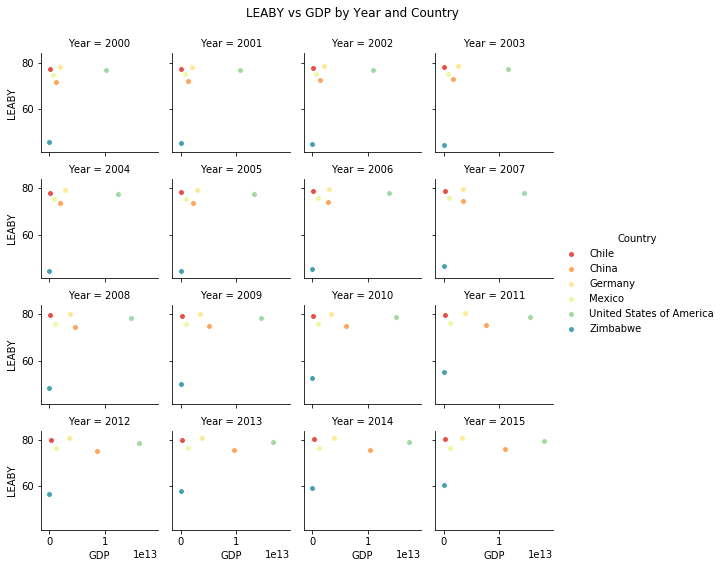

In [89]:
g = sns.FacetGrid(df, col='Year', hue='Country', col_wrap=4, height=2)
g = (g.map(plt.scatter, 'GDP', 'LEABY', edgecolor="w").add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('LEABY vs GDP by Year and Country')
plt.savefig("Scatter GDP vs LEABY by Year Country.png")


#### Which country moves the most along the X axis over the years?

China shows the most movement aong the X axis. 

#### Which country moves the most along the Y axis over the years

Zimbabwe shows the most movement along the Y axis. 

#### Is this surprising?

China's and Zimbabwe's movement along the X and Y axises, respectively, is inline with the largest changes in GDP and life expectancy, respectively. 

## Step 9: Line Plots for Life Expectancy 

In the scatter plot grid above, it was hard to isolate the change for GDP and Life expectancy over time. It would be better illustrated with a line graph for each GDP and Life Expectancy by country.

FacetGrid also allows you to do that! Instead of passing in plt.scatter as your Matplotlib function, you would have to pass in plt.plot to see a line graph. A few other things have to change as well. So we have created a different codesnippets with fill in the blanks. that makes use of a line chart, and we will make two seperate FacetGrids for both GDP and Life Expectancy separately.

Here are the instructors to fill in the blanks from the commented word bank:

    In this graph, we want Years on the X axis and Life Expectancy on the Y axis.
    We want the columns to be split up by Country
    We want to use a Matplotlib line plot to visualize the different graphs

Be sure to show your plot!


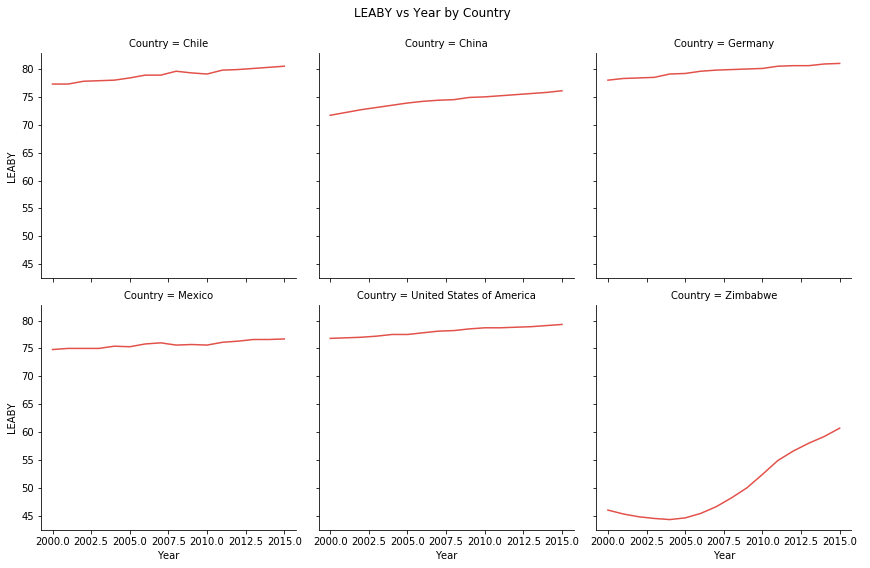

In [90]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4)
g = (g.map(plt.plot, 'Year', 'LEABY').add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('LEABY vs Year by Country')
plt.savefig("Line LEABY vs Year by Country.png")

#### Which countries' line changes the most?

Zimbabwe has largest changes in life expectancy of all countries

#### What years are there the biggest changes in the data?

Zimbabwe shows the biggest negative change from 2000 to about 2005. Both Chile and Mexico also show a negative change from 2007 to approximately 2009, inline with the 2008 global recession. All the other countries show a consistent linear positive trend in life expectancy. 

#### Which country has had the least change in life expectancy over time?

Mexico has the least change in life expectancy from 2000 to 2015. 

#### Can you think of any reasons that the data looks like this for particular countries?

Zimbabwe has experienced and continues to experience hyper inflation in the 21st century. The effect on life expectancy is unclear as in the first 5 years of the data set shows a decline and then a consistent increase all while under the hyper inflation. All other countries have a linear trend. 

## Step 10: Line Plots for GDP

Let's recreate the same FacetGrid for GDP now. Instead of Life Expectancy on the Y axis, we now we want GDP.

Once you complete and successfully run the code above, copy and paste it into the cell below. Change the variable for the X axis. Change the color on your own! Be sure to show your plot.


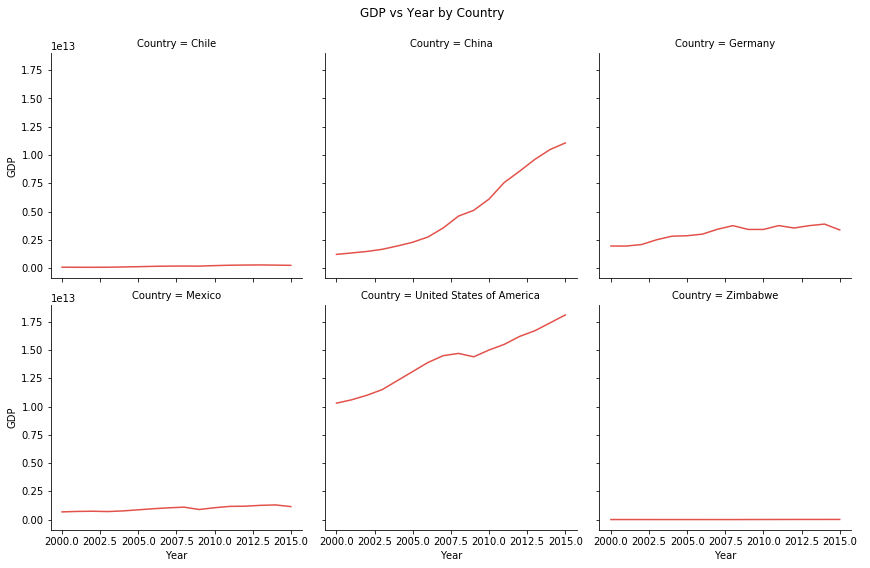

In [91]:
g = sns.FacetGrid(df, col='Country', col_wrap=3, height=4)
g = (g.map(plt.plot, 'Year', 'GDP').add_legend())
plt.subplots_adjust(top=0.9)
g.fig.suptitle('GDP vs Year by Country')
plt.savefig("Line GDP vs Year by Country.png")

#### Which countries have the highest and lowest GDP?


USA and Zimbabwe have the highest and lowest GDP, respectively. 

#### Which countries have the highest and lowest life expectancy?


Germany and Zimbabawe have the highest and lowest life expectancy, respectively. 

## Step 11: Data Analysis

#### Has life expectancy increased over time in the six nations?

All nations show an increase in life expectancy.

####  Has GDP increased over time in the six nations?

All nations show an increase in GDP. 

#### Is there a correlation between GDP and life expectancy of a country?

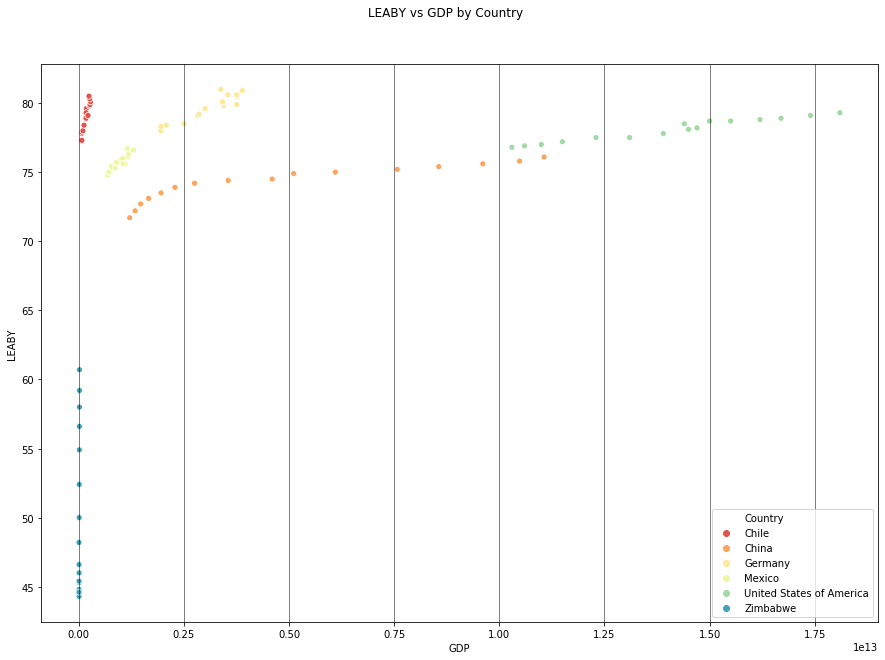

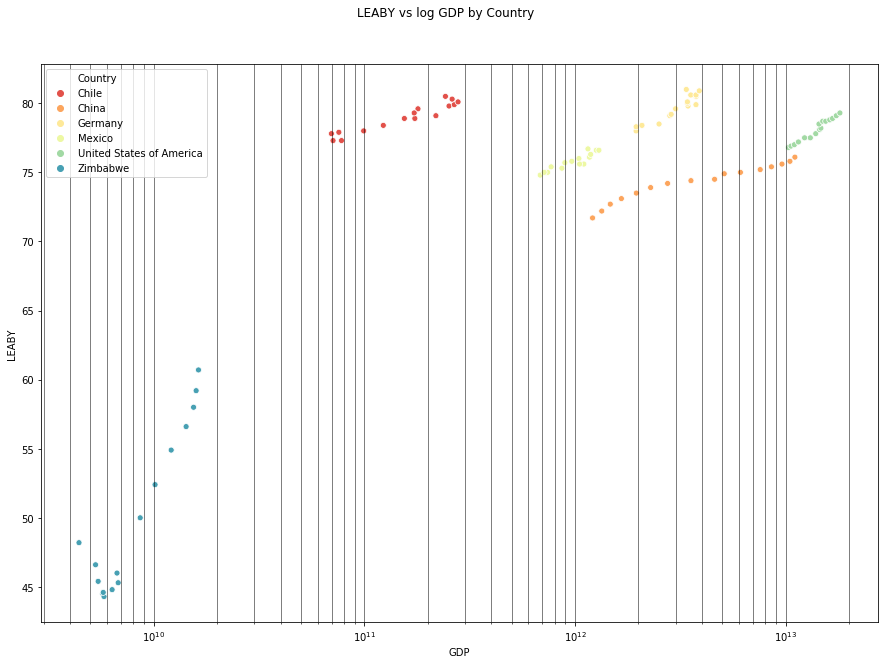

In [92]:
f, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df , x ="GDP", y ="LEABY", hue="Country")
plt.grid(axis='x', which='both', color='black', linestyle='-', linewidth=0.5)
plt.subplots_adjust(top=0.9)
f.suptitle('LEABY vs GDP by Country')
plt.savefig("Scatter LEABY vs GDP by Country.png")
plt.show()
f, ax2 = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df , x ="GDP", y ="LEABY", hue="Country")
ax2.set(xscale="log")
plt.grid(axis='x', which='both', color='black', linestyle='-', linewidth=0.5)
plt.subplots_adjust(top=0.9)
f.suptitle('LEABY vs log GDP by Country')
plt.savefig("Scatter LEABY vs log GDP by Country.png")
plt.show()


On initial inspection, all countires expect Zimbabwe and China show a linear correlation with varying postive slopes. As China's GDP surpassed 25'*'10^11 dollars, the trend has become more linear. 

####  What is the distribution of that life expectancy?

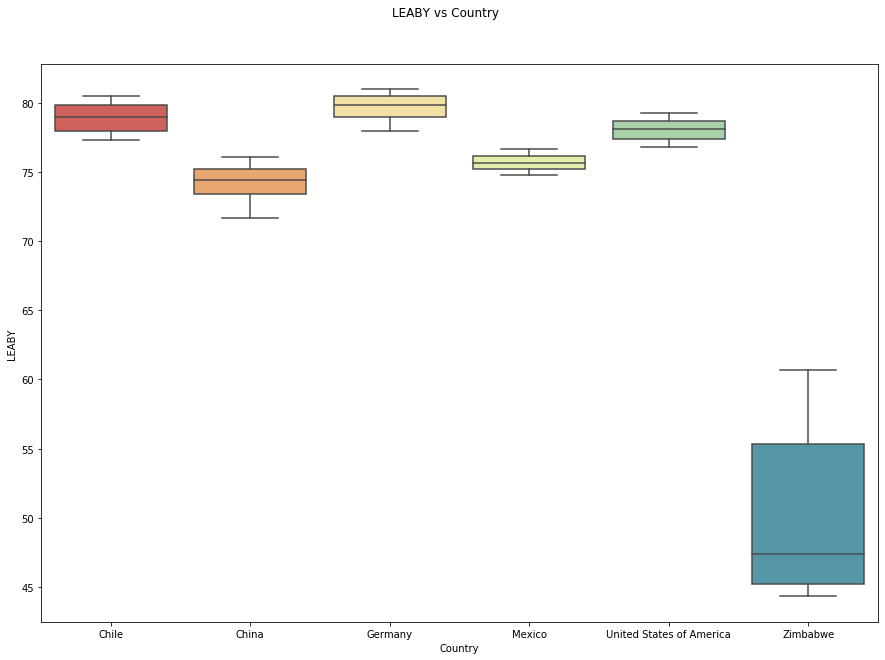

In [93]:
sns.set_palette('Spectral')
f, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, x='Country', y='LEABY')
plt.subplots_adjust(top=0.9)
f.suptitle('LEABY vs Country')
plt.savefig("Box LEABY vs Country.png")


## Step 12: Researching Data Context

Based on the visualization, choose one part the data to research a little further so you can add some real world context to the visualization. You can choose anything you like, or use the example question below.

What happened in China between in the past 10 years that increased the GDP so drastically?


#### What happen in Zimbabwe in last 15 years that could help explain the unsual trends in the dataset?

Zimbabwe is a very different country from the dataset provided by the WHO. Unlike the other countries, Zimbabwe is the only country from Africa and dramatically poorer. The first step would be to qualify the question's assertion that this is an unusual trend. Comparing to other country's LEABY from neighboring African countries, source https://ourworldindata.org/ in years:

* Zambia - LEABY: 44.00 (Y2000) to 61.74 (Y2015)
* Namibia - LEABY: 52.19 (Y2000) to 62.12 (Y2015)
* Botswana - LEABY: 50.63 (Y2000) to 67.34 (Y2015)
* South Africa - LEABY: 56.05 (Y2000) to 62.65(Y2015)
* Mozambique - LEABY: 48.95 (Y2000) to 57.21 (Y2015)
* **Zimbabwe - LEABY: 44.65 (Y2000) to 59.90 (Y2015)**

Zimbabwe mirrors Zambia's upward trend, even surpassing Mozambique's expected life expectancy in 2015. However Zimbabwe continues to lag behind their neighboring countries, failing to surpass the expected life expectancy of 60 years. In general, African nations in this region have all seen large gains in expected life expectancy. 

Comparing to other country's GDP from neighboring African countries, source https://ourworldindata.org/ in (GBP):

* Zambia - GDP: 2.38E+09 (Y2000) to 1.65E+10 (Y2014)
* Namibia - GDP: 2.58+08 (Y2000) to 7.8E+09 (Y2014)
* Botswana - GDP: 3.83E+08 (Y2000) to 9.65E+09 (Y2014)
* South Africa - GDP: 9.01E+10 (Y2000) to 2.13E+11(Y2014)
* Mozambique - GDP: 4.25E+09 (Y2000) to 1.03E+10 (Y2014)
* **Zimbabwe - GDP: 4.42E+09 (Y2000) to 8.63E+09 (Y2014)**

In 2000, Zimbabwe was only second to South Africa in terms of GDP in 2000. By 2014, Only Namibia had a marginally smaller GDP when compared to Zimbabwe. This should be taken in the context that all other neighboring countries have seen at least an order of magnitude increase in their nominal GDP. Zimbabwe has maintained its GDP in single digits of billions of pounds between 2000 and 2014. This suggests internal factors have contributed to Zimbabwe's GDP story.

Between 2000 and 2014, the following factors were uniquely affecting Zimbabwe:

  * aftermath of 1980s/1990s land reform program, lead to decline in exports and food production
  * a sanctioned economy by western power, denying access to international markets 
  * a hyperinflation period between 2004-2009, dramatic weakening of Zimbabwe's currency
 
The aforementioned factors unique to Zimbabwe all affect the economy and ordinary people's ability to access goods and services. These disruptions all explain the relatively poor GDP performance when compared to its neighbors.

The neighboring African countries all support the previous assertion that lower values of life expectancy are more sensitive to changes in GDP.

## Step 13: Create Blog Post

Use the content you have created in this Jupyter notebook to create a blog post reflecting on this data. Include the following visuals in your blogpost:

    The violin plot of the life expectancy distribution by country
    The facet grid of scatter graphs mapping GDP as a function Life Expectancy by country
    The facet grid of line graphs mapping GDP by country
    The facet grid of line graphs mapping Life Expectancy by country

We encourage you to spend some time customizing the color and style of your plots! Remember to use plt.savefig("filename.png") to save your figures as a .png file.

When authoring your blog post, here are a few guiding questions to guide your research and writing:

    How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?
    What would have helped make the project data more reliable? What were the limitations of the dataset?
    Which graphs better illustrate different relationships??



#### How do you think the histories and the cultural values of each country relate to its GDP and life expectancy?

The histories of each country are very important considerations to put the GDP and life expectancy data in context. The dataset from the WHO has countries that are sanctioned and poor to world class and developed.  Countires like USA and Germany have a 

#### What would have helped make the project data more reliable? What were the limitations of the dataset?

The major limitations of the dataset are:

* Sample size: Country

The sample size of the population is very important in any analysis. In 2000 there are 230 countries and the sample size is only 6, 2.6% of all countries. By population for the year 2000, 28.57% is covered by the sample size. Ideally the sample size of countries would be higher to be able to account for the differences in countries. 

* Sample size: Timeline

Overlap of nominal GDP numbers between countries by having longer timelines would aid the analysis. The dataset has nominal GDP overlap between China, Germany and Mexico. However these countries are very different from each other. 

* Selection Criteria: Countries

The countries in the dataset are too diverse and too few in number to provide an accurate analysis. Adding more countries and grouping them with similar GDP per capital, Gini coefficient, government types and other factors would help reduce the noise from the data.

* Variable: GDP

GDP is a very board economic indicator that does not differentiate between a dollar spend on factors that actually contribute to life expectancy or not. Further a country with large populations will naturally have larger GDPs. GDP per capital would be a better metric of available GDP per person. 


The best analysis would have access to all country's GDP per capital and LEABY. Countries would be grouped based on geography, GDP per capital and the Gini coefficient. The goal 





#### Which graphs better illustrate different relationships??

The violin plot is very useful in depicting the data distribution. 
Correlation between variables are best shown through a scatterplots. 

#### Conclusion